Found this function to clean html tags, and i added a line to remove line breaks. 

In [1]:
def clean_html(html):
    """
    Remove HTML markup from the given string.

    :param html: the HTML string to be cleaned
    :type html: str
    :rtype: str
    """

    # First we remove inline JavaScript/CSS:
    cleaned = re.sub(r"(?is)<(script|style).*?>.*?(</\1>)", "", html.strip())
    # Then we remove html comments. This has to be done before removing regular
    # tags since comments can contain '>' characters.
    cleaned = re.sub(r"(?s)<!--(.*?)-->[\n]?", "", cleaned)
    # Next we can remove the remaining tags:
    cleaned = re.sub(r"(?s)<.*?>", " ", cleaned)
    # Finally, we deal with whitespace
    cleaned = re.sub(r"&nbsp;", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    cleaned = cleaned.replace("\n","")
    return cleaned.strip() 

In [2]:
import pandas as pd
import numpy as np
import re

## Mood analysis of all job descriptions
* We made a cleanup of html tags and line breaks from the descriptions  
* afterwards removed all english stopwords in order to take the most relevant "meaningful" ones


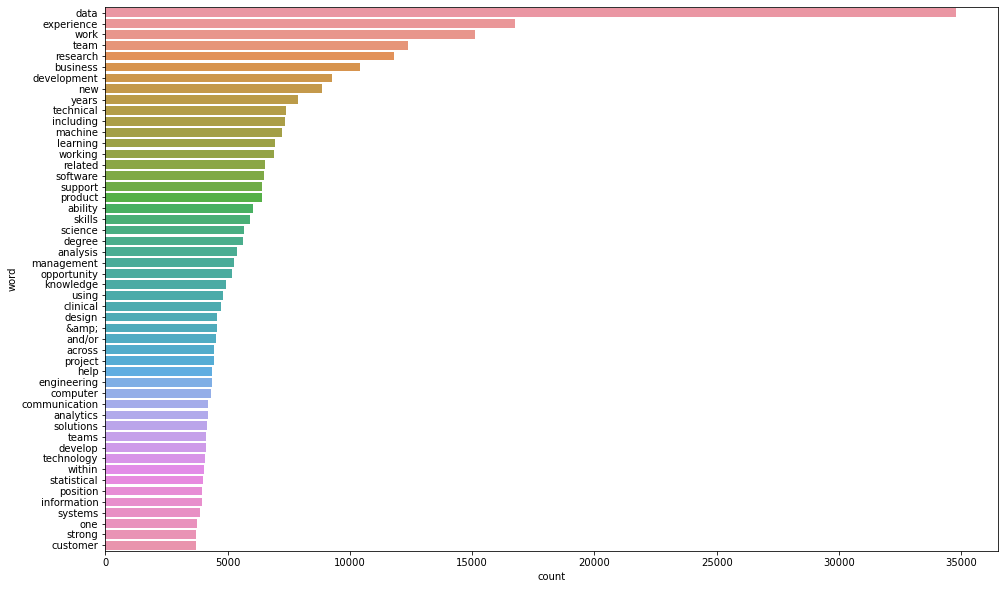

In [21]:
#Reading the csv File 
la = pd.read_csv('alldata.csv')

#Creating a column with the descriptions without HTML tags, nor line breaks
la['clean_descr'] = [x for x in la['description']]
la['clean_descr'] = [clean_html(str(x)) for x in la['description']]

#stopwords without meaning in english language 
stop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

#Counting all words that arent in the prev list of stopwords
from collections import Counter
allwords=[]
for desc in la['clean_descr']:
    for wrd in desc.split():
        if wrd.lower() not in stop:
            allwords.append(wrd.lower())
allwords = Counter(allwords)

#Creating a dataframe from the counted dictionary allwords 
allwords_data = pd.DataFrame.from_dict(allwords, orient='index').reset_index()
allwords_data.columns = ['word','count']
allwords_data = allwords_data.sort_values(by=['count'], ascending= False)

#Visualization of the 50 more repeated words.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
ax = sns.barplot(y="word",x='count', data=allwords_data[:50])

## Here we proceed to clean and check the most repeated job names 

In [22]:
la.head()

,position,company,description,reviews,location,clean_descr
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301",Development DirectorALS Therapy Development In...
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA","Job Description""The road that leads to accompl..."
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA","Growing company located in the Atlanta, GA are..."
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",DEPARTMENT: Program OperationsPOSITION LOCATIO...
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",DESCRIPTIONThe Emory University Department of ...


In [69]:
la['clean-position'] = [str(x).lower().strip() for x in la['position']]
pos = pd.DataFrame(la['clean-position'].value_counts())
pos = pos.reset_index()
pos.columns = ['pos','count']

pos

,pos,count
0,data scientist,355
1,senior data scientist,98
2,research analyst,66
3,data engineer,63
4,machine learning engineer,56
...,...,...
5212,"web developer, sr.",1
5213,junior web development instructor,1
5214,lead fermentation scientist,1
5215,"research analyst, production technology & busi...",1


<AxesSubplot:xlabel='count', ylabel='pos'>

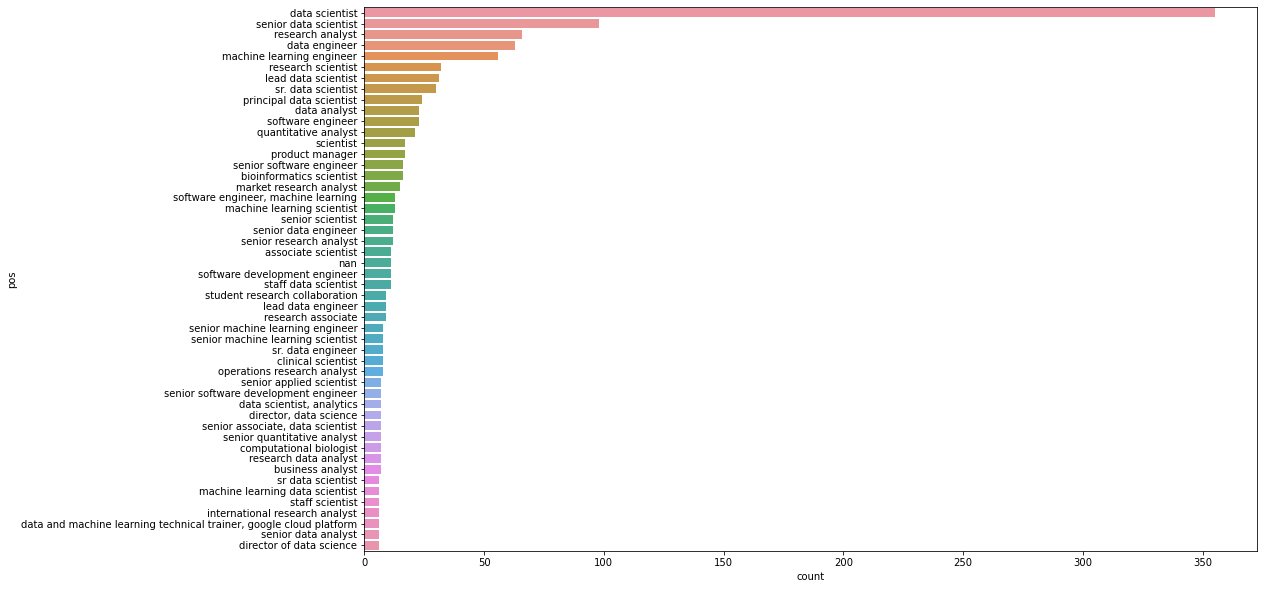

In [70]:
plt.figure(figsize=(16, 10))
sns.barplot(y='pos',x = 'count', data = pos[:50])

In [68]:
la.head()

,position,company,description,reviews,location,clean_descr,position-clean
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301",Development DirectorALS Therapy Development In...,development director
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA","Job Description""The road that leads to accompl...",an ostentatiously-excitable principal research...
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA","Growing company located in the Atlanta, GA are...",data scientist
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",DEPARTMENT: Program OperationsPOSITION LOCATIO...,data analyst
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",DESCRIPTIONThe Emory University Department of ...,assistant professor -tt - signal processing & ...
